In [31]:
import numpy as np
import csv
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline




In [2]:
os.path.dirname(sys.executable)


'C:\\Program Files\\Anaconda2'

Null Hypothesis: 

Alternate Hypothesis:


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/extracredit_kpd286/avg_rents.csv')


In [4]:
df.head()

,year,ALL UNITS,Owner Units,Renter Units,Stabilized,Median Household Income,Mean Household income,Mean Market rate rent,Mean rent stabilized rent,Monthly Property Taxes,Median Monthly Property Taxes
0,2014.0,"3,400,093","1,033,225","2,184,296","1,029,918","$86,586","$50,376","$1,446","$1,317",$405,$333
1,2011.0,"3,352,041","1,014,941","2,172,634","986,840","$78,203","$48,000","$1,280","$1,137",$349,$292
2,2008.0,"3,327,078","1,045,818","2,144,454","1,023,248",NaN,NaN,"$1,119","$1,008",$268,$233
3,2005.0,"3,260,855","1,031,780","2,092,363","1,043,677",NaN,NaN,$956,$908,$229,$183
4,2002.0,"3,208,588","997,003","2,084,769","1,013,954",NaN,NaN,$832,$795,$159,$142


In [5]:
df.columns

Index([u'year', u'ALL UNITS', u'Owner Units', u'Renter Units', u'Stabilized',
       u'Median Household Income', u'Mean Household income',
       u'Mean Market rate rent', u'Mean rent stabilized rent',
       u'Monthly Property Taxes', u'Median Monthly Property Taxes'],
      dtype='object')

In [6]:
df1 = df.apply(pd.to_numeric, errors='ignore')

In [7]:
df1 = df1.drop(['Mean Household income', 'Median Household Income'], axis=1)

In [8]:
df1.head()

,year,ALL UNITS,Owner Units,Renter Units,Stabilized,Mean Market rate rent,Mean rent stabilized rent,Monthly Property Taxes,Median Monthly Property Taxes
0,2014.0,"3,400,093","1,033,225","2,184,296","1,029,918","$1,446","$1,317",$405,$333
1,2011.0,"3,352,041","1,014,941","2,172,634","986,840","$1,280","$1,137",$349,$292
2,2008.0,"3,327,078","1,045,818","2,144,454","1,023,248","$1,119","$1,008",$268,$233
3,2005.0,"3,260,855","1,031,780","2,092,363","1,043,677",$956,$908,$229,$183
4,2002.0,"3,208,588","997,003","2,084,769","1,013,954",$832,$795,$159,$142


In [9]:
df1['Monthly Property Taxes'] = df1['Monthly Property Taxes'].replace( '[\$,)]','', regex=True)
df1['Mean Market rate rent'] = df1['Mean Market rate rent'].replace( '[\$,)]','', regex=True)
df1['Mean rent stabilized rent'] = df1['Mean rent stabilized rent'].replace( '[\$,)]','', regex=True)

In [10]:
df1['Monthly Property Taxes']


0    405 
1    349 
2    268 
3    229 
4    159 
5    146 
6    136 
7    136 
8     NaN
Name: Monthly Property Taxes, dtype: object

In [11]:
df1['Mean Market rate rent']

0    1446 
1    1280 
2    1119 
3     956 
4     832 
5     727 
6     645 
7     564 
8      NaN
Name: Mean Market rate rent, dtype: object

df1['Monthly Property Taxes'] = df1['Monthly Property Taxes'].apply(pd.to_numeric, errors='coerce')
df1['Mean Market rate rent'] = df1

In [12]:
df1['Monthly Property Taxes'] = df1['Monthly Property Taxes'].apply(pd.to_numeric, errors='coerce')
df1['Mean Market rate rent'] = df1['Mean Market rate rent'].apply(pd.to_numeric, errors='coerce')
df1['Mean rent stabilized rent'] = df1['Mean rent stabilized rent'].apply(pd.to_numeric, errors='coerce')


In [13]:
df1['Monthly Property Taxes']

0    405.0
1    349.0
2    268.0
3    229.0
4    159.0
5    146.0
6    136.0
7    136.0
8      NaN
Name: Monthly Property Taxes, dtype: float64

In [14]:
df1['year']

0    2014.0
1    2011.0
2    2008.0
3    2005.0
4    2002.0
5    1999.0
6    1996.0
7    1993.0
8       NaN
Name: year, dtype: float64

In [15]:
df1['Mean Market rate rent']

0    1446.0
1    1280.0
2    1119.0
3     956.0
4     832.0
5     727.0
6     645.0
7     564.0
8       NaN
Name: Mean Market rate rent, dtype: float64

In [16]:
year = df1['year']
mpt = df1['Monthly Property Taxes']
mmrr = df1['Mean Market rate rent']
mrsr = df1['Mean rent stabilized rent']

<function matplotlib.pyplot.plot>

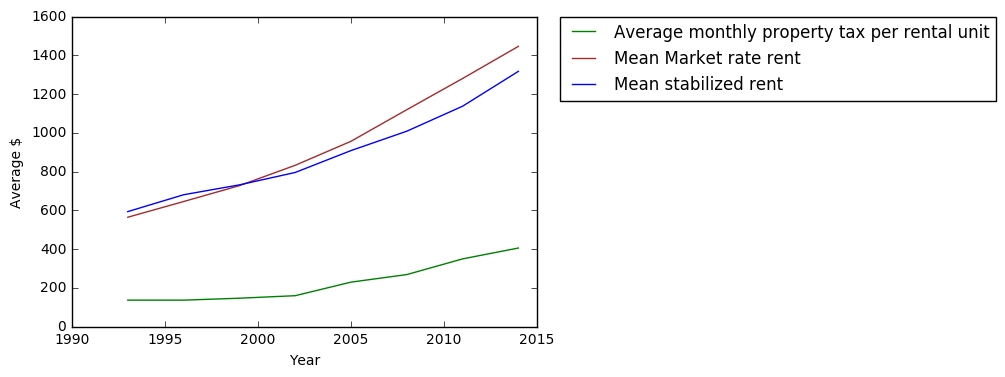

In [17]:
plt.plot(year, mpt, label = "Average monthly property tax per rental unit", color="green")
plt.plot(year, mmrr, color="brown")
plt.plot(year, mrsr, label="Mean stabilized rent", color="blue")
plt.xlabel ("Year")
plt.ylabel("Average $")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot

In [18]:
df1.head()

,year,ALL UNITS,Owner Units,Renter Units,Stabilized,Mean Market rate rent,Mean rent stabilized rent,Monthly Property Taxes,Median Monthly Property Taxes
0,2014.0,"3,400,093","1,033,225","2,184,296","1,029,918",1446.0,1317.0,405.0,$333
1,2011.0,"3,352,041","1,014,941","2,172,634","986,840",1280.0,1137.0,349.0,$292
2,2008.0,"3,327,078","1,045,818","2,144,454","1,023,248",1119.0,1008.0,268.0,$233
3,2005.0,"3,260,855","1,031,780","2,092,363","1,043,677",956.0,908.0,229.0,$183
4,2002.0,"3,208,588","997,003","2,084,769","1,013,954",832.0,795.0,159.0,$142


In [19]:
df1['Percentage_mrkt'] = (df1['Monthly Property Taxes'] / df1['Mean Market rate rent'])
df1['Percentage_stbl'] = (df1['Monthly Property Taxes'] / df1['Mean rent stabilized rent'])


<function matplotlib.pyplot.plot>

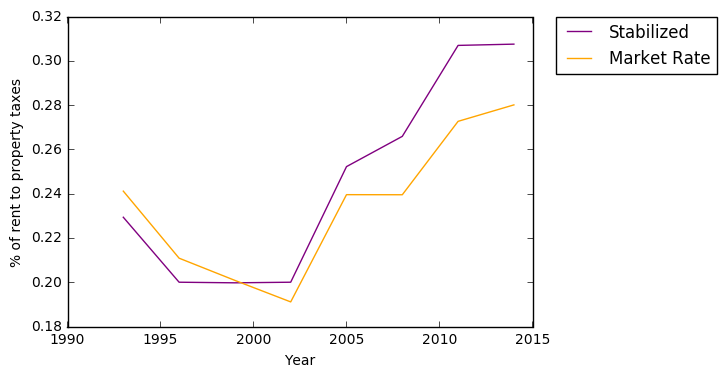

In [20]:
plt.plot(year, df1['Percentage_stbl'], label = "Stabilized", color="purple")
plt.plot(year, df1['Percentage_mrkt'], label = "Market Rate", color="orange")
plt.xlabel ("Year")
plt.ylabel("% of rent to property taxes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot

In [21]:
rent_control_data = pd.read_csv('https://raw.githubusercontent.com/KDumanski/PUI2016_kpd286/master/extracredit_kpd286/ACS%20Rent%20Burden%20Data.csv')

In [22]:
rent_control_data.head()

,Year,At least 30% of income spent on rent,At least 35% of income spent on rent,At least 40% of income spent on rent,At least 50% of income spent on rent
0,2005,51.735001,42.742936,36.239344,27.906787
1,2006,50.876707,41.896940,35.941762,27.928954
2,2007,49.775832,41.048068,34.888998,26.608945
3,2008,50.136925,41.415085,35.128213,26.923715
4,2009,51.048535,42.239029,35.965139,27.547013


In [23]:
rent_control_data.columns

Index([u'Year', u'At least 30% of income spent on rent',
       u'At least 35% of income spent on rent',
       u'At least 40% of income spent on rent',
       u'At least 50% of income spent on rent'],
      dtype='object')

In [24]:
rent_control_data['Year'] = year2 = rent_control_data['Year'].apply(pd.to_numeric, errors='coerce')
rent_control_data['At least 30% of income spent on rent'] = rent_control_data['At least 30% of income spent on rent'].apply(pd.to_numeric, errors='coerce')
rent_control_data['At least 35% of income spent on rent'] = rent_control_data['At least 35% of income spent on rent'].apply(pd.to_numeric, errors='coerce')
rent_control_data['At least 50% of income spent on rent'] = rent_control_data['At least 50% of income spent on rent'].apply(pd.to_numeric, errors='coerce')


In [25]:
year2 = rent_control_data['Year']
thirtyfive = rent_control_data['At least 30% of income spent on rent']
forty = rent_control_data['At least 35% of income spent on rent']
fortyfive = rent_control_data['At least 50% of income spent on rent']

In [26]:
rent_control_data.head()

,Year,At least 30% of income spent on rent,At least 35% of income spent on rent,At least 40% of income spent on rent,At least 50% of income spent on rent
0,2005,51.735001,42.742936,36.239344,27.906787
1,2006,50.876707,41.896940,35.941762,27.928954
2,2007,49.775832,41.048068,34.888998,26.608945
3,2008,50.136925,41.415085,35.128213,26.923715
4,2009,51.048535,42.239029,35.965139,27.547013


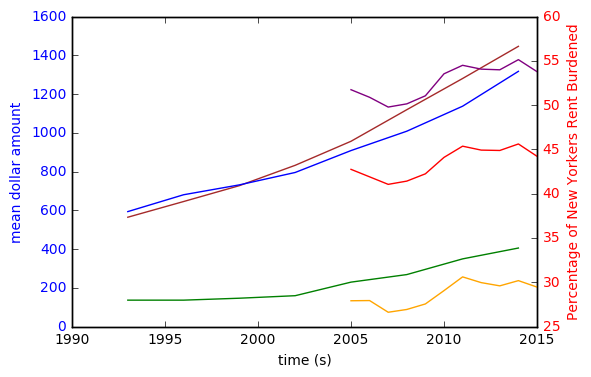

In [30]:
fig, ax1 = plt.subplots()


ax1.plot(year, mpt, label = "Average monthly property tax per rental unit", color="green")
ax1.plot(year, mmrr, color="brown")
ax1.plot(year, mrsr, label="Mean stabilized rent", color="blue")

ax1.set_xlabel('time (s)')

ax1.set_ylabel('mean dollar amount', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(year2, thirtyfive, label = 'percent of New Yorkers paying 35% or more on property taxes', color="purple")
ax2.plot(year2, forty, label = 'percent of New Yorkers paying 40% or more on property taxes',color="red")
ax2.plot(year2, fortyfive, label = 'percent of New Yorkers paying 45% or more on property taxes', color="orange")
ax2.set_ylabel('Percentage of New Yorkers Rent Burdened', color='r')

for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
    
plt.show()





In [43]:
# make the arrays the same length witht he data we have.  I plotted 
mpt
mpt2 = [146.0, 159.0, 229.0, 268.0, 349.0, 405.0]

In [44]:
thirtyfive
thirtyfive2 = [51.048535, 53.530466, 54.490633, 54.056600, 53.981799, 55.127531]

In [51]:
stats.pearsonr(mpt2, thirtyfive2)

(0.72926199595580854, 0.10002617872430214)

In [46]:
stats.spearmanr(mpt2, thirtyfive2, axis=0)

SpearmanrResult(correlation=0.77142857142857146, pvalue=0.072396501457725942)